In [105]:
import requests
import pandas as pd
# import numpy as np

In [90]:
# import tqdm
# import time

In [95]:
import json
# import prettytable

Need to Initialize variables for the token and url values

In [96]:
token = '70e5b01b221e44558b7ea4b6bf6ba0be'
url = 'https://api.bls.gov/publicAPI/v2/timeseries'

Creating the key per BLS specifications and initiliazing a dictionary to specify which Series we would like to gather

In [97]:
key = '?registrationkey={}'.format(token)

# Dictionary of series IDs from BLS website, with short description of what the series contains
series_dict = {
    'LNS14000025': 'Men',
    'LNS14000026': 'Women',
    'LNS14000003': 'White',
    'LNS14000006': 'Black/AA',
    'LNS14032183': 'Asian',
    'LNS14000009': 'Hispanic/Latino'
    }

The API call to gather the json data happens here

In [98]:
headers = {'Content-type': 'application/json'}

# Range of years to pull
dates = ('2022', '2023')

data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

response = requests.post(
    '{}{}'.format(f'{url}/data/', key),
    headers=headers,
    data=data).json()['Results']['series']


Defining functions to programmatically pull data out of json for use in a dataframe

In [99]:
# First function is to pull the year and month values from the json data
def parse_json_time(series):
  df = pd.DataFrame()

  # initialize blank lists for years and months
  year = list()
  month = list()

  # iterate through each item in the data and append needed values
  for i in series['data']:
    year.append(i['year'])
    month.append(i['periodName'])

  # use each least created in the for loop to create a column
  df['Year'] = year
  df['Month'] = month
  return df


# Second function is to pull only the data values from the json data
def parse_json_value(series):

  # Initialze blank list for the values
  values = list()

  # Iterate through each item and add just what is in the value key to the list
  for i in series['data']:
    values.append(i['value'])

  # return the list of values to be added to the dataframe in next step
  return values

In [100]:
# Initialized datafram with just the months and years gathered
df = parse_json_time(response[0])
df.head()

,Year,Month
0,2023,December
1,2023,November
2,2023,October
3,2023,September
4,2023,August


In [104]:
# Iterate through every series in the json data with the parse_json_value function
# This will create a list that can be added to the dataframe as a column
# The column name for each list is the value associated with the seriesID key pulled from the jason data

for i in response:
  df[series_dict[i['seriesID']]] = parse_json_value(i)

Final unemployment dataframe includes a columns for year and month, and for each series values

In [103]:
df.head(20)

,Year,Month,Men,Women,White,Black/AA,Asian,Hispanic/Latino
0,2023,December,3.5,3.3,3.5,5.2,3.1,5.0
1,2023,November,3.7,3.1,3.3,5.8,3.5,4.6
2,2023,October,3.7,3.2,3.5,5.8,3.1,4.8
3,2023,September,3.8,3.1,3.4,5.7,2.9,4.6
4,2023,August,3.7,3.2,3.4,5.3,3.2,4.9
5,2023,July,3.4,3.1,3.1,5.7,2.3,4.4
6,2023,June,3.4,3.1,3.1,6.0,3.1,4.2
7,2023,May,3.5,3.3,3.3,5.7,3.0,4.1
8,2023,April,3.3,3.1,3.1,4.8,2.8,4.4
9,2023,March,3.4,3.2,3.2,5.1,2.8,4.6


In [108]:
df['Date'] = pd.to_datetime(df['Year'] + ' ' + df['Month'])

<ipython-input-108-71332fbd8c42>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'] + ' ' + df['Month'])


In [109]:
df.head()

,Year,Month,Men,Women,White,Black/AA,Asian,Hispanic/Latino,Date
0,2023,December,3.5,3.3,3.5,5.2,3.1,5.0,2023-12-01
1,2023,November,3.7,3.1,3.3,5.8,3.5,4.6,2023-11-01
2,2023,October,3.7,3.2,3.5,5.8,3.1,4.8,2023-10-01
3,2023,September,3.8,3.1,3.4,5.7,2.9,4.6,2023-09-01
4,2023,August,3.7,3.2,3.4,5.3,3.2,4.9,2023-08-01


In [114]:
import seaborn as sns
from matplotlib import pyplot as plt

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             24 non-null     object        
 1   Month            24 non-null     object        
 2   Men              24 non-null     object        
 3   Women            24 non-null     object        
 4   White            24 non-null     object        
 5   Black/AA         24 non-null     object        
 6   Asian            24 non-null     object        
 7   Hispanic/Latino  24 non-null     object        
 8   Date             24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 1.8+ KB


In [122]:
numeric_columns = ['Men',	'Women',	'White',	'Black/AA',	'Asian',	'Hispanic/Latino']

In [123]:
for i in numeric_columns:
  df[i] = pd.to_numeric(df[i])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             24 non-null     object        
 1   Month            24 non-null     object        
 2   Men              24 non-null     float64       
 3   Women            24 non-null     float64       
 4   White            24 non-null     float64       
 5   Black/AA         24 non-null     float64       
 6   Asian            24 non-null     float64       
 7   Hispanic/Latino  24 non-null     float64       
 8   Date             24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ KB


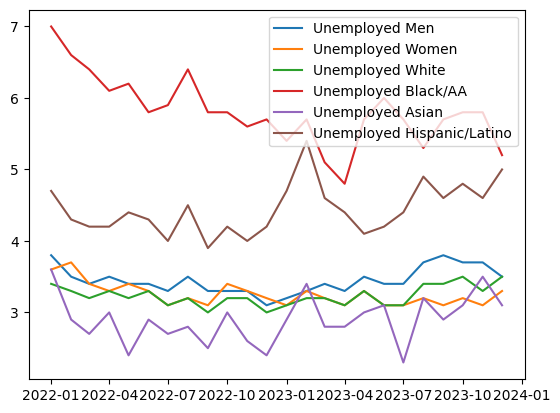

In [125]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Men'], label='Unemployed Men')
ax.plot(df['Date'], df['Women'], label='Unemployed Women')
ax.plot(df['Date'], df['White'], label='Unemployed White')
ax.plot(df['Date'], df['Black/AA'], label='Unemployed Black/AA')
ax.plot(df['Date'], df['Asian'], label='Unemployed Asian')
ax.plot(df['Date'], df['Hispanic/Latino'], label='Unemployed Hispanic/Latino')
ax.legend()